In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'signal, arb.units')

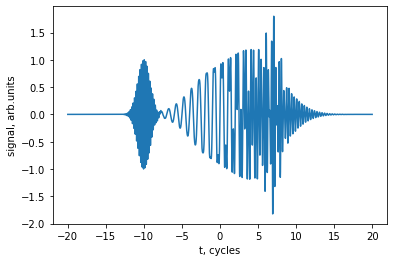

In [9]:
# generate the signal
nofts=1000
t=np.linspace(-20*2*pi, 20*2*pi, 3**9+6)
y=np.sin(t)*exp(-t**2/2/20**2)
y=y+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*exp(-(t+10*2*pi)**2/2/5**2)
y=y+np.sin(4*t)*exp(-(t-7*2*pi)**2/2/5**2)

plt.plot(t/2/pi,y)

xlabel('t, cycles')
ylabel('signal, arb.units')

Text(0, 0.5, 'Power spectrum, arb. units')

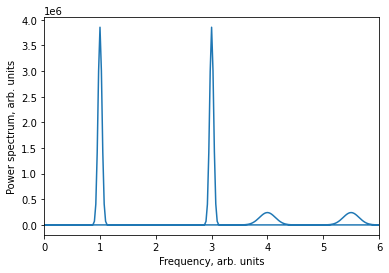

In [3]:
# Fourier spectrum
sp=np.fft.fft(y)
w=fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
plot(w, abs(sp)**2)
xlim(0,6)
title('Fourier transform')
xlabel('Frequency, arb. units')
ylabel('Power spectrum, arb. units')

In [5]:
def get_specgram(y, t, window_width=2.0*2*pi, nwindowsteps=1000):
    # your implementation here
    window_steps = np.linspace(t[0], t[-1], nwindowsteps)
    window_width = window_width
    
    specgram = np.empty((len(t), nwindowsteps))
    for i, window_position in enumerate(window_steps):
        window_function = exp(-(t-window_position)**2/2/window_width**2)
        y_window = y * window_function
        specgram[:,i] = abs(np.fft.fft(y_window))

    return specgram

In [6]:
spec = get_specgram(y,t)

Text(0, 0.5, 'Frequency')

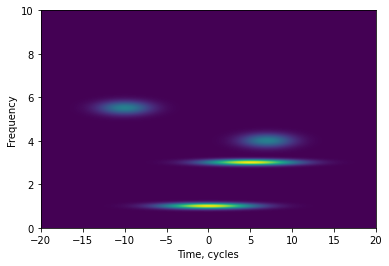

In [8]:
# plot spectrogram, explain what you see
plt.imshow(spec, aspect='auto', origin='lower', extent = [min(t)/2/pi, max(t)/2/pi, w[0], 1/(t[1]-t[0])*2*pi])
plt.title('Spectrogram')
plt.ylim(0,10)
plt.xlabel('Time, cycles')
plt.ylabel('Frequency')

In [10]:
from timeit import timeit

In [13]:
# ATTENTION: TAKE AT LEAST 20 MINUTES TO FINISH
# if you want to decrease waiting time and accuracy you can write number=1 in the function timeit below

n_steps = 2**14
change = 2
times = []
for i in range(6):
    t=np.linspace(-20*2*pi, 20*2*pi, n_steps*change**i)
    y=np.sin(t)*exp(-t**2/2/20**2)
    y=y+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
    y=y+np.sin(5.5*t)*exp(-(t+10*2*pi)**2/2/5**2)
    y=y+np.sin(4*t)*exp(-(t-7*2*pi)**2/2/5**2)
    time_m = timeit('get_specgram(y,t)', number=10, globals=globals())
    times.append(time_m)

We can see that time grows exponentially. I suppose this is due to increase in the number of data (more timesteps - more points of signal to process) - each window contains more and more points inside

Text(0, 0.5, 'Time, s')

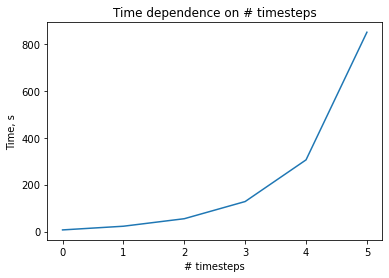

In [16]:
plt.plot(np.arange(6),times)
plt.title('Time dependence on # timesteps')
xlabel('# timesteps')
ylabel('Time, s')